# Imports 

In [1]:
import ipynb.fs.full.PrepareData as data
from sklearn.multioutput import MultiOutputRegressor
import itertools

strategyArray = []
errorArray    = [[], []]

/home/leandro/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
  9%|▉         | 4/43 [00:00<00:01, 35.13it/s]

[250, 247, 243, 250, 240, 247, 250, 253, 249, 247, 245, 248, 248]
2 chs: 250 entries
3 chs: 247 entries
4 chs: 243 entries
5 chs: 250 entries
6 chs: 240 entries
7 chs: 247 entries
8 chs: 250 entries
9 chs: 253 entries
10 chs: 249 entries
15 chs: 247 entries
20 chs: 245 entries
30 chs: 248 entries
40 chs: 248 entries
Dataset entries: 3120


 77%|███████▋  | 33/43 [00:07<00:02,  4.94it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 88%|████████▊ | 38/43 [00:08<00:00,  5.51it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 21%|██        | 9/43 [00:00<00:02, 15.50it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 74%|███████▍  | 32/43 [00:06<00:02,  4.91it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 91%|█████████ | 39/43 [00:08<00:00,  4.60it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 91%|█████████ | 39/43 [00:07<00:00,  4.20it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 21%|██        | 9/43 [00:00<00:02, 16.36it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 88%|████████▊ | 38/43 [00:07<00:01,  3.87it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 91%|█████████ | 39/43 [00:08<00:01,  3.25it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 21%|██        | 9/43 [00:00<00:02, 16.26it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 77%|███████▋  | 33/43 [00:07<00:02,  4.21it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 88%|████████▊ | 38/43 [00:08<00:00,  5.76it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 43/43 [00:08<00:00,  5.03it/s]


# Sorting the dataset

In [2]:
sortedDict = {}
commonRegressors = data.commonRegressors

for regressor in commonRegressors:
    sortedDict[regressor] = 0
    
    for i in range(data.ampNumber):
        sortedDict[regressor] += data.finalList[i][regressor][0] + data.finalList[i][regressor][1]


sortedDict = dict(sorted(sortedDict.items(), key = lambda x : x[1]))
sortedDict = dict(itertools.islice(sortedDict.items(), 5))

print(sortedDict.keys())

dict_keys(['TweedieRegressor', 'GeneralizedLinearRegressor', 'BayesianRidge', 'OrthogonalMatchingPursuitCV', 'ElasticNetCV'])


# Processing data

In [3]:
from sklearn.metrics import mean_absolute_error

def getMAE(yTrue, yPredicted):
    gainErrors = []
    lossErrors = []
    
    rangeList = list(range(len(yTrue[0])))
    
    for true, predicted in zip(yTrue, yPredicted):
        gainTrue      = [true[x] for x in rangeList[0::2]]
        gainPredicted = [predicted[x] for x in rangeList[0::2]]
        lossTrue      = [true[x] for x in rangeList[1::2]]
        lossPredicted = [predicted[x] for x in rangeList[1::2]]
        
        gainErrors.append(mean_absolute_error(gainTrue, gainPredicted))
        lossErrors.append(mean_absolute_error(lossTrue, lossPredicted))
        
    return gainErrors, lossErrors

# Plotting function

In [4]:
import matplotlib.pyplot as plt

def plotGrid(gainData, lossData):
    fontSize = 32
    
    fig, axis = plt.subplots(2, figsize = (10, 10))
    
    axis[0].boxplot(gainData)
    axis[0].set_title("Test error for Gain", fontsize = fontSize)
    axis[0].get_xaxis().set_visible(False)
    axis[0].yaxis.set_tick_params(labelsize = fontSize)
    axis[0].set_yticklabels(range(0, 4))
    axis[0].set_ylim(0, 3)
    
    axis[1].boxplot(lossData)
    axis[1].set_title("Test error for Loss", fontsize = fontSize)
    axis[1].xaxis.set_tick_params(labelsize = fontSize)
    axis[1].yaxis.set_tick_params(labelsize = fontSize)
    axis[1].set_xticklabels(strategyArray)
    axis[1].set_yticklabels(range(0, 4))
    axis[1].set_ylim(0, 3)

    #fig.text(0.053, 0.5, 'Erro Médio Absoluto (dB)', va='center', rotation='vertical', fontsize = 30)

    plt.gcf().subplots_adjust(bottom = 0.08)
    fig.savefig("../../graphs/perLink-{}amp.pdf".format(data.ampNumber), format = 'pdf', dpi = 1000, bbox_inches = "tight")

# Building the models

In [5]:
cvData = []
X, y = data.loadDataset()

for i in range(5):
    X_train, X_test, y_train, y_test = data.train_test_split(X, y, test_size = 0.3, random_state = i)
    cvData.append([X_train, X_test, y_train, y_test])
    
count = 1

In [6]:
from sklearn.linear_model import BayesianRidge

errorArray[0].append([])
errorArray[1].append([])

for i in range(5):
    model = MultiOutputRegressor(BayesianRidge())
    model.fit(cvData[i][0], cvData[i][2])

    result = model.predict(cvData[i][1])

    print(cvData[i][-1][0], result[0])

    mae = getMAE(cvData[i][3], result)

    errorArray[0][-1].extend(mae[0])
    errorArray[1][-1].extend(mae[1])

strategyArray.append("BR")
count += 1

[17.  0. 19.  1. 24.  0.] [17.03932216  0.27365807 19.14223855  0.97485631 21.70492951  0.05547047]
[17.  0. 23.  5. 24.  1.] [17.02196817  0.2704955  19.15851247  0.99107367 21.68798227  0.10990507]
[17.  0. 19.  1. 19.  0.] [17.01906052  0.2828416  19.16705266  0.98745755 21.69003299  0.05363752]
[17.  0. 19.  1. 22.  1.] [17.02725108  0.26937529 19.14504852  0.96849004 21.68997037  0.67154958]
[17.  0. 19.  1. 21.  0.] [17.018701    0.26562804 19.15602307  0.98382267 21.7251027   0.09097851]


In [7]:
from sklearn.ensemble import RandomForestRegressor

errorArray[0].append([])
errorArray[1].append([])

for i in range(5):
    model = MultiOutputRegressor(RandomForestRegressor())
    model.fit(cvData[i][0], cvData[i][2])

    result = model.predict(cvData[i][1])

    print(cvData[i][-1][0], result[0])

    mae = getMAE(cvData[i][3], result)

    errorArray[0][-1].extend(mae[0])
    errorArray[1][-1].extend(mae[1])

strategyArray.append("RF")
count += 1

[17.  0. 19.  1. 24.  0.] [17.0721721   0.30961583 19.00124445  0.85795515 21.5578899   0.05050547]
[17.  0. 23.  5. 24.  1.] [17.03673258  0.26357712 19.21970137  1.06219288 21.76820757  0.10860605]
[17.  0. 19.  1. 19.  0.] [16.98533661  0.2910391  19.20782283  0.94691652 21.69147396  0.05594741]
[17.  0. 19.  1. 22.  1.] [17.0356437   0.28211271 19.00290498  0.84017897 21.59624585  0.67890854]
[17.  0. 19.  1. 21.  0.] [17.01312083  0.24117703 19.24498005  1.08094678 21.75675712  0.08562771]


In [8]:
from sklearn.tree import DecisionTreeRegressor

errorArray[0].append([])
errorArray[1].append([])

for i in range(5):
    model = MultiOutputRegressor(DecisionTreeRegressor())
    model.fit(cvData[i][0], cvData[i][2])

    result = model.predict(cvData[i][1])

    print(cvData[i][-1][0], result[0])

    mae = getMAE(cvData[i][3], result)

    errorArray[0][-1].extend(mae[0])
    errorArray[1][-1].extend(mae[1])

strategyArray.append("DT")
count += 1

[17.  0. 19.  1. 24.  0.] [17.07647059  0.30588235 19.          0.86470588 21.55882353  0.05294118]
[17.  0. 23.  5. 24.  1.] [17.03067485  0.25766871 19.22699387  1.06748466 21.7607362   0.11042945]
[17.  0. 19.  1. 19.  0.] [16.98816568  0.29585799 19.20710059  0.94674556 21.68639053  0.05325444]
[17.  0. 19.  1. 22.  1.] [17.03703704  0.28395062 19.          0.83950617 21.59876543  0.67283951]
[17.  0. 19.  1. 21.  0.] [17.01639344  0.24043716 19.25136612  1.08743169 21.74863388  0.08743169]


In [9]:
from sklearn.linear_model import LassoCV

errorArray[0].append([])
errorArray[1].append([])

for i in range(5):
    model = MultiOutputRegressor(LassoCV())
    model.fit(cvData[i][0], cvData[i][2])

    result = model.predict(cvData[i][1])

    print(cvData[i][-1][0], result[0])

    mae = getMAE(cvData[i][3], result)

    errorArray[0][-1].extend(mae[0])
    errorArray[1][-1].extend(mae[1])

strategyArray.append("LCV")
count += 1

[17.  0. 19.  1. 24.  0.] [17.06887824  0.27345133 19.14159292  0.97389381 21.70486726  0.05403008]
[17.  0. 23.  5. 24.  1.] [17.01935632  0.27123894 19.20850877  0.98893805 21.6880531   0.1058882 ]
[17.  0. 19.  1. 19.  0.] [17.03050437  0.2770334  19.17576355  0.98893805 21.69070796  0.05325444]
[17.  0. 19.  1. 22.  1.] [17.03130496  0.26882851 19.12853282  0.96461884 21.69159292  0.66927554]
[17.  0. 19.  1. 21.  0.] [17.01905498  0.26286019 19.1539823   0.98274336 21.72522124  0.08916355]


In [10]:
from sklearn.dummy import DummyRegressor

errorArray[0].append([])
errorArray[1].append([])

for i in range(5):
    model = MultiOutputRegressor(DummyRegressor())
    model.fit(cvData[i][0], cvData[i][2])

    result = model.predict(cvData[i][1])

    print(cvData[i][-1][0], result[0])
    
    mae = getMAE(cvData[i][3], result)

    errorArray[0][-1].extend(mae[0])
    errorArray[1][-1].extend(mae[1])

strategyArray.append("SM")
count += 1

[17.  0. 19.  1. 24.  0.] [17.03230088  0.27345133 19.14159292  0.97389381 21.70486726  0.27300885]
[17.  0. 23.  5. 24.  1.] [17.02610619  0.27123894 19.15707965  0.98893805 21.6880531   0.27654867]
[17.  0. 19.  1. 19.  0.] [17.0340708   0.28097345 19.16460177  0.98893805 21.69070796  0.28185841]
[17.  0. 19.  1. 22.  1.] [17.02964602  0.26946903 19.14778761  0.97345133 21.69159292  0.28495575]
[17.  0. 19.  1. 21.  0.] [17.02522124  0.26371681 19.1539823   0.98274336 21.72522124  0.27920354]


dict_keys(['TweedieRegressor', 'GeneralizedLinearRegressor', 'BayesianRidge', 'OrthogonalMatchingPursuitCV', 'ElasticNetCV'])
### Gain ###
Mean: 0.8153866326521378. Median: 0.8229095745130929. Max: 2.075412717952657
Mean: 0.8181773238775792. Median: 0.8220328484144078. Max: 2.081190812773059
Mean: 0.8180980548193082. Median: 0.8228070175438601. Max: 2.0888888888888886
Mean: 0.8159372234434107. Median: 0.8214708122981449. Max: 2.09372973178456
Mean: 0.8149105759366314. Median: 0.8230088495575222. Max: 2.0634218289085537
### Loss ###
Mean: 0.5070885867375843. Median: 0.48107926261139583. Max: 1.798397366622724
Mean: 0.5112914998682584. Median: 0.49650394360942407. Max: 1.8224317084955246
Mean: 0.5115033139532077. Median: 0.4980392156862745. Max: 1.8219696969696966
Mean: 0.5069954169450653. Median: 0.4792161194741595. Max: 1.800076375126567
Mean: 0.5511087061745984. Median: 0.524188790560472. Max: 1.8247787610619468
Mean Total - Gain: 0.8165019621458136. Loss: 0.5175975047357428


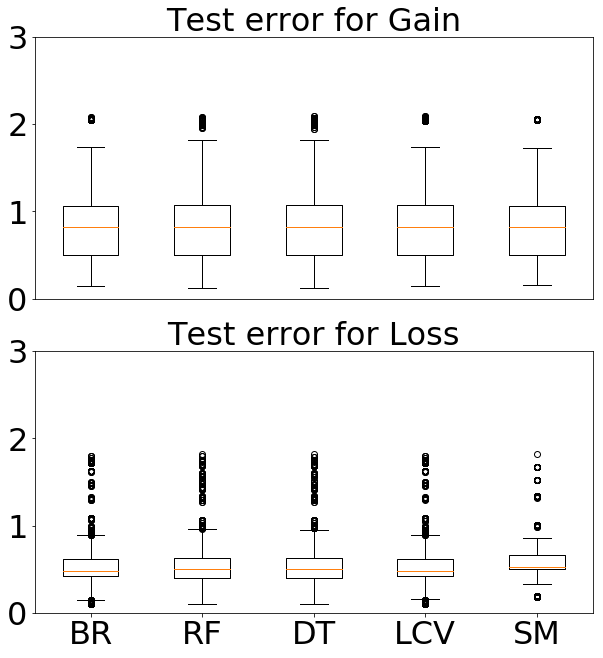

In [11]:
import numpy as np
print(sortedDict.keys())

gain = 0
print("### Gain ###")

for gainError in errorArray[0]:
    gain += np.mean(gainError)
    print("Mean: {}. Median: {}. Max: {}".format(np.mean(gainError), np.median(gainError), np.max(gainError)))

loss = 0
print("### Loss ###")

for lossError in errorArray[1]:
    loss += np.mean(lossError)
    print("Mean: {}. Median: {}. Max: {}".format(np.mean(lossError), np.median(lossError), np.max(lossError)))
    
print("Mean Total - Gain: {}. Loss: {}".format(gain / 5, loss / 5))
plotGrid(errorArray[0], errorArray[1])